### **Langkah 0 - _Import Library_**

In [10]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import typing as t

### **Langkah 1 - _Load Data_ Citra**

Kita akan mencoba menggunakan 1 data citra dari dataset yang telah disediakan.

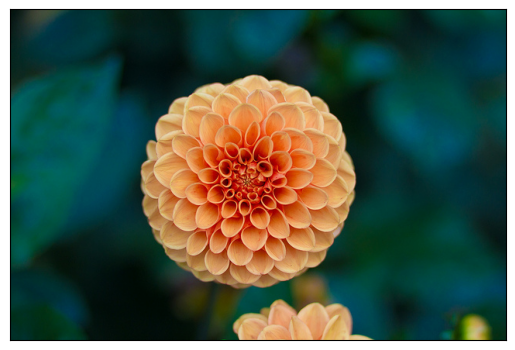

In [4]:
flower: np.ndarray[tuple[int, int], np.dtype[np.uint8]] = load_sample_image("flower.jpg")
ax: plt.Axes = plt.axes(xticks=[], yticks=[]) # type: ignore
ax.imshow(flower) # type: ignore

### **Langkah 2 - _Preprocessing_**

Selanjutnya kita akan melakukan pengecekan ukuran citra dan normalisasi warna.

In [5]:
# Check shape
print(flower.shape)

# Normalize color
data: np.ndarray = flower / 255.0

# Reshape
data: np.ndarray = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


### **Langkah 3 - Cek Sebaran Warna**
Buat fungsi berikut,

In [9]:
def plot_pixels(data: t.Any, title: str, colors: t.Union[t.Any, None] = None, N: int = 10000): # type: ignore
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors: t.Any = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # type: ignore
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20) # type: ignore

Panggil fungsi untuk mengetahui sebaran warna,

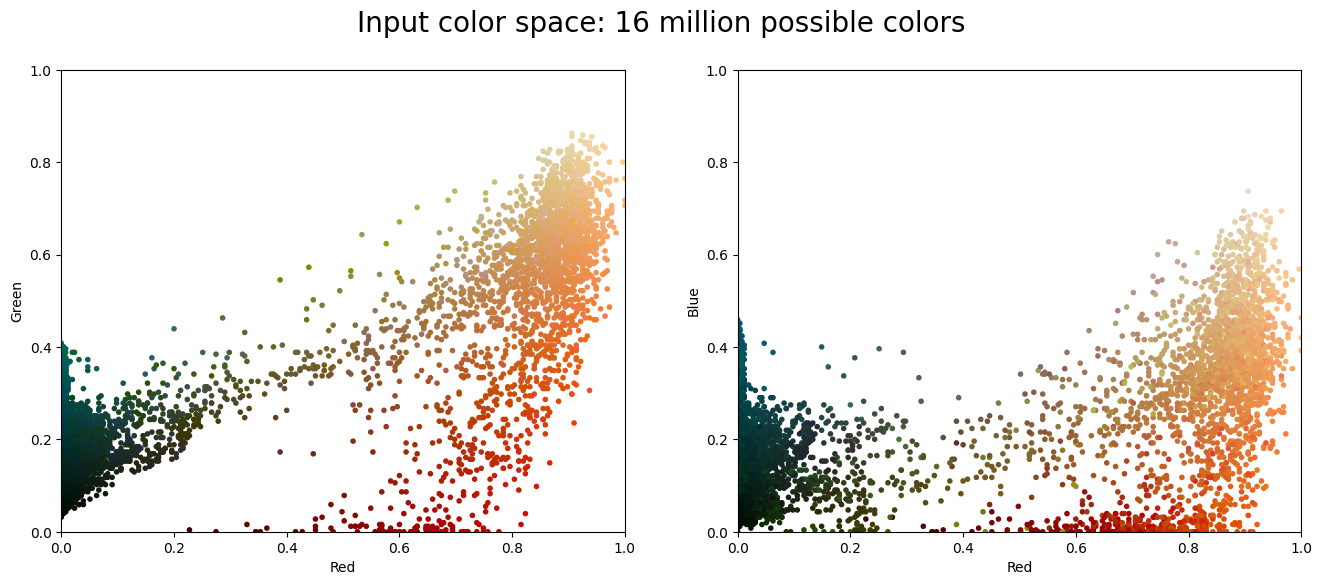

In [8]:
plot_pixels(data, title='Input color space: 16 million possible colors')

### **Langkah 4 - Klasterisasi Warna**

Pada tahap ini kita akan melakukan klasterisasi hanya dengan 16 warna saja.

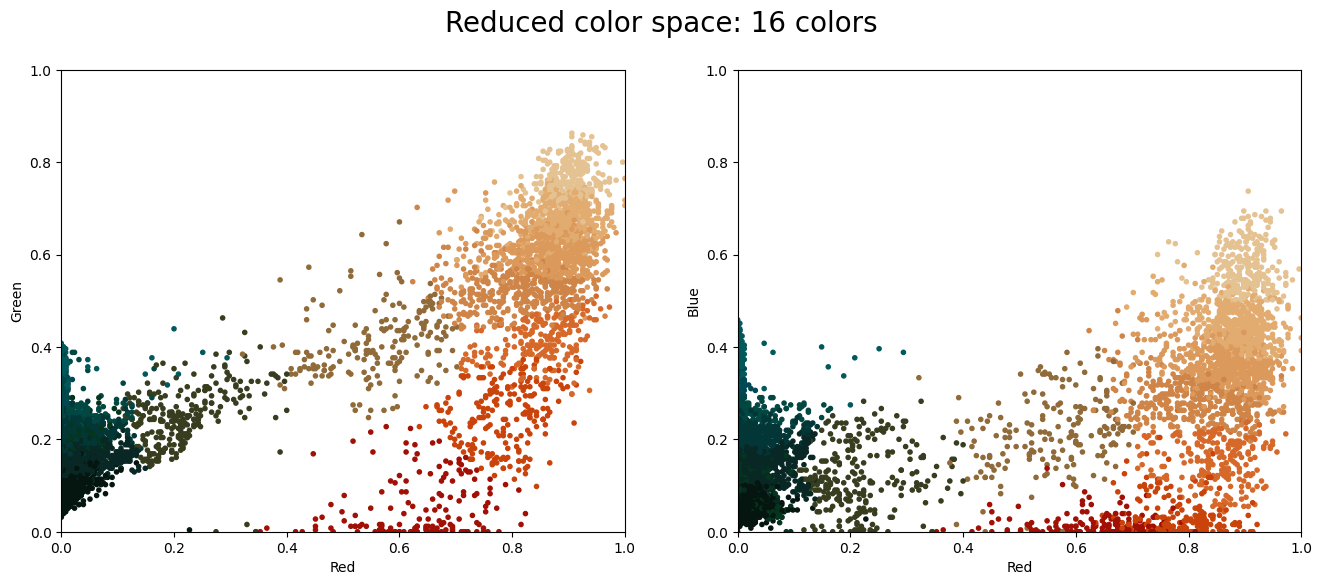

In [12]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Hasil perbandingan warna citra sebelum dan setelah kompresi adalah sebagai berikut,

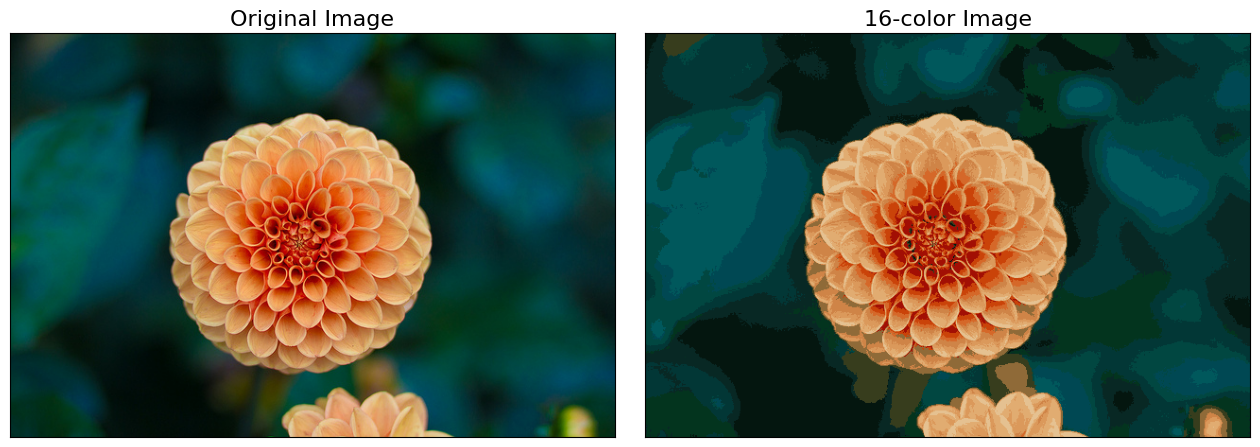

In [13]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[])) # type: ignore
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);